# 前置 coordinate ascent 算法实现与可视化展示

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import importlib
#%matplotlib
#%matplotlib gtk
%matplotlib inline

[2.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
[2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


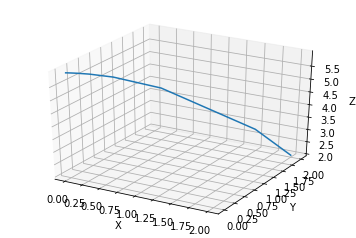

5.99999809265


In [3]:
def f(x1,x2):
    """
    函数 f(x1,x2) = -x1^2 -2*x2^2 + 2*x1*x2 +6
    """
    return -x1*x1-2*x2*x2+2*x1*x2+6

#偏导
def f_x1(x2):
    return x2
#偏导
def f_x2(x1):
    return 1/2.0*x1
def main(x1,x2,err):
    f0=f(x1,x2)
    x1s=[]
    x2s=[]
    fs=[]
    x1s.append(x1)
    x2s.append(x2)
    fs.append(f0)
    x1=f_x1(x2)
    x2=f_x2(x1)
    f1=f(x1,x2)
    x1s.append(x1)
    x2s.append(x2)
    fs.append(f1)
    while(abs(f1-f0)>err):
        f0=f1
        x1=f_x1(x2)
        x2=f_x2(x1)
        f1=f(x1,x2)
        x1s.append(x1)
        x2s.append(x2)
        fs.append(f1)
    print(x1s)
    print(x2s)
    # draw 3D picture
    fig =plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot(x1s,x2s,fs)
    ax.set_xlabel('X')
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    #for i in range(len(x1s)):
    #    print x1s[i]
    #    plt.text(x1s[i],x2s[i]+(10-i)/2,""+str(fs[i]))
    plt.show()
    print(f1)
main(2.0,2.0,0.00001)


# SMO代码阅读

In [5]:
from numpy import *
from time import sleep

In [6]:
def loadDataSet(fileName):
    # 辅助函数： 加载数据，
    dataMat = []; labelMat = []
    #fr = open(fileName)
    with open(fileName) as fr
        for line in fr.readlines():
            lineArr = line.strip().split('\t')
            dataMat.append([float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
    # dataMat = [[3.5,2.0],[3.0,2.6],[4.0,3.0]]
    # label = [-1,1,1]
    return dataMat,labelMat

In [7]:
def selectJrand(i,m):
    # 辅助函数： 随机选取一个小于m的不为i的数。
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m)) #random中uniform的定义可以使用 help(random.uniform)进行查看。
    return j

def clipAlpha(aj,H,L):
    # 如果aj的值大于H返回H，如果aj的值小于L返回L,否则返回aj
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

In [8]:
dataMat,labelMat = loadDataSet("testSet.txt")
print(dataMat[0],dataMat[1])
print(labelMat[0],labelMat[1])

([3.542485, 1.977398], [3.018896, 2.556416])
(-1.0, -1.0)


In [11]:
multiply(arange(9.0).reshape(3,3),arange(3.0))

array([[ 0.,  1.,  4.],
       [ 0.,  4., 10.],
       [ 0.,  7., 16.]])

In [12]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """
    @ dataMatIn 数据集
    @ classLabels 表示标签
    @ C 常数，限定alphas（或a）的值为0到C
    @ toler 容错率
    @ maxIter 退出前重试的次数
    """
    # 简化版函数 
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose() # matrix 将输入的数据矩阵化，方便矩阵运算，transpose 矩阵的转置。
    b = 0; m,n = shape(dataMatrix) #shape是 Return the shape of an array.
    alphas = mat(zeros((m,1))) # zeros 接收的参数描述的是初始化矩阵的形状（行列）这里创建一个列矩阵
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # y=w*x +b w=sum_{i=1}^n ai*yi*xi ==> fXi = sum_{i=1}^n ai*yi*xi *xi +b
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b #multiply 
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions 损失/误差
            # 在if语句中， 不管是 正间隔 还是 负间隔 都会被测试。 
            # 并且在该if语句中，也要同时检查 alpha 值， 以保证
            # 其不能等于0或C。 由于后面 alpha（a） 小于 0 或 大于 C 
            # 时将被调整为 0 或 C， 所以一旦在该if语句中它们等于
            # 这两个值的话， 那么它们就已经在“边界”上了，因而
            # 不再能够减小或增大， 因此也就不值得再对它们进行优化了。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 随机选择一个j
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                # 由于python 会通过引用传递所有参数，想要保存修改前的数据，通过copy() 的方法来实现，
                # 因此稍后可以将新的 alpha 值与老的 alpha 值进行比较。copy分配的新内存。
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                # 为了保证修改后的量a_j能够落在L，H之间，确定合适的L,H？数学上的便利？
                if (labelMat[i] != labelMat[j]): 
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else: # 是正负样本 # 都为正样本或都为负样本
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                # 最大值和最小值相等，表示其没有优化空间，跳过本次循环
                if L==H: print "L==H"; continue
                # 最优修改量，类似于获取步长，最优的修改量
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T  
                # 如果步长为0，不用优化，原因是简化版，简化处理过程
                if eta >= 0: print "eta>=0"; continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta # 根据步长，获取新生成的a_j
                alphas[j] = clipAlpha(alphas[j],H,L) # 保证a_j落在H，L区间内
                # 轻微的调整就退出
                if (abs(alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; continue
                # a_i同样需要改变但方向相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                # 为了设置新常数b，这里和上边的求fXi和fXj类似，也是有公式推导出来的
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print "iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print "iteration number: %d" % iter
    return b,alphas


In [13]:
b,alphas=smoSimple(dataMat,labelMat,0.6,0.001,40)
print b
m,n = shape(alphas)
# 打印支持向量
for i in range(m):
    if alphas[i]>0:
        print dataMat[i],labelMat[i]

iter: 0 i:0, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:11, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
L==H
iter: 0 i:29, pairs changed 3
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
L==H
L==H
iter: 0 i:25, pairs changed 1
L==H
iter: 0 i:29, pairs changed 2
j not moving enough
iter: 0 i:54, pairs changed 3
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
L==H
iteration number: 0
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:17, pairs changed 1
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not movin

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
iter: 1 i:8, pairs changed 1
iter: 1 i:17, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
iter: 3 i:23, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not movin

iteration number: 2
iter: 2 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not movi

j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
iter: 9 i:54, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not movi

j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
iter: 12 i:29, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
iter: 0 i:55, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving eno

iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
iter: 12 i:29, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not 

iteration number: 2
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
iteration number: 18
j not movin

iteration number: 19
j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
iteration number: 28
j not moving enough
j not moving enough
iteration number: 29
j not moving enough
j not moving enough
iteration number: 30
j not moving enough
j not moving enough
iteration number: 31
j not moving enough
j not moving enough
iteration number: 32
j not moving enough
j not moving enough
iteration number: 33
j not moving enough
j not moving enough
iteration number: 34
j not moving enough
iter: 34 i:55, pairs changed 1
iteration num

In [14]:
def calcWs(alphas,dataArr,classLabels):
    X = mat(dataArr); labelMat = mat(classLabels).transpose()
    m,n = shape(X)
    w = zeros((n,1))
    for i in range(m):
        w += multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

In [15]:
ws = calcWs(alphas,dataMat,labelMat)
datMat=mat(dataMat)
print datMat[0]*mat(ws)+b
print labelMat[0]

[[-1.47065268]]
-1.0


# SMO的优化改进版本
## 优化点
为了保证约束条件的一致，每一次迭代需要选取一对alphas，采用启发式的发现方法，能够提高找到有效alphas对的效率，进而提高代码运行时间。
一对alphas的选取都存在这优化空间：
- 第一个alphas的选取，采用所有数据集上单遍扫描和非边界alpha中实现单遍扫描。非边界指不在0，和C上的alphas值。同时跳过哪些已知的不会改变的alpha值。
- 第二个alphas的选取，会通过最大化步长的方式来获取第二个alpha的值。在简化版的SMO算法中，我们会在选择j后计算误差Ej。但在这里，我们会常见一个全局缓存用来保存误差值，并从中选择能够使步长或者Ej-Ei最大的alpha值。

In [16]:
class optStructK:
    """
    辅助类，用户保存必要的全局信息，包括dataMatIn,包括labelMat信息，限定常数，和容错率
    """
    def __init__(self,dataMatIn, classLabels, C, toler):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0] # 样本数量
        self.alphas = mat(zeros((self.m,1)))# 全局alphas的数量
        self.b = 0 #初始B端的值
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        
def calcEkK(oS, k):
    # 计算k位置的预测值，然后计算误差，并返回
    fXk = float(multiply(oS.alphas,oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJK(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0] # 返回非空索引的id
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEkK(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEkK(oS, j)
    return j, Ej

def updateEkK(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEkK(oS, k)
    oS.eCache[k] = [1,Ek]
        
def innerLK(i, oS):
    Ei = calcEkK(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJK(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.X[i,:]*oS.X[j,:].T - oS.X[i,:]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEkK(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEkK(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.X[j,:]*oS.X[j,:].T
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoPK(dataMatIn, classLabels, C, toler, maxIter):    #full Platt SMO
    oS = optStructK(mat(dataMatIn),mat(classLabels).transpose(),C,toler)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerLK(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerLK(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    return oS.b,oS.alphas


## 运行验证

In [17]:
b,alphas=smoPK(dataMat,labelMat,0.6,0.001,40)
print b
m,n = shape(alphas)
# 打印支持向量
for i in range(m):
    if alphas[i]>0:
        print dataMat[i],labelMat[i]
ws = calcWs(alphas,dataMat,labelMat)
datMat=mat(dataMat)
print datMat[0]*mat(ws)+b,labelMat[0]
print datMat[1]*mat(ws)+b,labelMat[1]

fullSet, iter: 0 i:0, pairs changed 1
fullSet, iter: 0 i:1, pairs changed 1
fullSet, iter: 0 i:2, pairs changed 2
fullSet, iter: 0 i:3, pairs changed 3
L==H
fullSet, iter: 0 i:4, pairs changed 3
L==H
fullSet, iter: 0 i:5, pairs changed 3
L==H
fullSet, iter: 0 i:6, pairs changed 3
fullSet, iter: 0 i:7, pairs changed 4
j not moving enough
fullSet, iter: 0 i:8, pairs changed 4
fullSet, iter: 0 i:9, pairs changed 4
fullSet, iter: 0 i:10, pairs changed 5
fullSet, iter: 0 i:11, pairs changed 5
fullSet, iter: 0 i:12, pairs changed 5
fullSet, iter: 0 i:13, pairs changed 5
fullSet, iter: 0 i:14, pairs changed 5
L==H
fullSet, iter: 0 i:15, pairs changed 5
fullSet, iter: 0 i:16, pairs changed 5
fullSet, iter: 0 i:17, pairs changed 5
L==H
fullSet, iter: 0 i:18, pairs changed 5
fullSet, iter: 0 i:19, pairs changed 5
fullSet, iter: 0 i:20, pairs changed 5
fullSet, iter: 0 i:21, pairs changed 5
L==H
fullSet, iter: 0 i:22, pairs changed 5
fullSet, iter: 0 i:23, pairs changed 6
fullSet, iter: 0 i:24, p

# 添加核函数版本

In [18]:
def kernelTrans(X, A, kTup): #calc the kernel or transform data to a higher dimensional space
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0]=='lin': K = X * A.T   #linear kernel
    elif kTup[0]=='rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = exp(K/(-1*kTup[1]**2)) #divide in NumPy is element-wise not matrix like Matlab
    else: raise NameError('Houston We Have a Problem -- \
    That Kernel is not recognized')
    return K
class optStruct:
    def __init__(self,dataMatIn, classLabels, C, toler, kTup):  # Initialize the structure with the parameters 
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = shape(dataMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        self.eCache = mat(zeros((self.m,2))) #first column is valid flag
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

In [19]:
def calcEk(oS, k):
    fXk = float(multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek
        
def selectJ(i, oS, Ei):         #this is the second choice -heurstic, and calcs Ej
    maxK = -1; maxDeltaE = 0; Ej = 0
    oS.eCache[i] = [1,Ei]  #set valid #choose the alpha that gives the maximum delta E
    validEcacheList = nonzero(oS.eCache[:,0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:   #loop through valid Ecache values and find the one that maximizes delta E
            if k == i: continue #don't calc for i, waste of time
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej
    else:   #in this case (first time around) we don't have any valid eCache values
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

def updateEk(oS, k):#after any alpha has changed update the new value in the cache
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1,Ek]

In [20]:
def innerL(i, oS):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j,Ej = selectJ(i, oS, Ei) #this has been changed from selectJrand
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L==H: print "L==H"; return 0
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j] #changed for kernel
        if eta >= 0: print "eta>=0"; return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        updateEk(oS, j) #added this for the Ecache
        if (abs(oS.alphas[j] - alphaJold) < 0.00001): print "j not moving enough"; return 0
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])#update i by the same amount as j
        updateEk(oS, i) #added this for the Ecache                    #the update is in the oppostie direction
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else: return 0

def smoP(dataMatIn, classLabels, C, toler, maxIter,kTup=('lin', 0)):    #full Platt SMO
    oS = optStruct(mat(dataMatIn),mat(classLabels).transpose(),C,toler, kTup)
    iter = 0
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        if entireSet:   #go over all
            for i in range(oS.m):        
                alphaPairsChanged += innerL(i,oS)
                print "fullSet, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        else:#go over non-bound (railed) alphas
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print "non-bound, iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged)
            iter += 1
        if entireSet: entireSet = False #toggle entire set loop
        elif (alphaPairsChanged == 0): entireSet = True  
        print "iteration number: %d" % iter
    return oS.b,oS.alphas

In [21]:
b,alphas = smoP(dataMat,labelMat,0.6,0.001,40)
print b
m,n = shape(alphas)
# 打印支持向量
for i in range(m):
    if alphas[i]>0:
        print dataMat[i],labelMat[i]

L==H
fullSet, iter: 0 i:0, pairs changed 0
L==H
fullSet, iter: 0 i:1, pairs changed 0
fullSet, iter: 0 i:2, pairs changed 1
L==H
fullSet, iter: 0 i:3, pairs changed 1
fullSet, iter: 0 i:4, pairs changed 2
fullSet, iter: 0 i:5, pairs changed 2
fullSet, iter: 0 i:6, pairs changed 2
j not moving enough
fullSet, iter: 0 i:7, pairs changed 2
L==H
fullSet, iter: 0 i:8, pairs changed 2
fullSet, iter: 0 i:9, pairs changed 2
L==H
fullSet, iter: 0 i:10, pairs changed 2
L==H
fullSet, iter: 0 i:11, pairs changed 2
L==H
fullSet, iter: 0 i:12, pairs changed 2
fullSet, iter: 0 i:13, pairs changed 2
L==H
fullSet, iter: 0 i:14, pairs changed 2
fullSet, iter: 0 i:15, pairs changed 2
fullSet, iter: 0 i:16, pairs changed 2
L==H
fullSet, iter: 0 i:17, pairs changed 2
fullSet, iter: 0 i:18, pairs changed 3
fullSet, iter: 0 i:19, pairs changed 3
fullSet, iter: 0 i:20, pairs changed 3
fullSet, iter: 0 i:21, pairs changed 3
j not moving enough
fullSet, iter: 0 i:22, pairs changed 3
L==H
fullSet, iter: 0 i:23, 